<a href="https://colab.research.google.com/github/gj0210/CMP7239/blob/main/Lab3_Classification_(KNN)_and_its_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 3's Session for CMP7239 Applied Machine Learning

# Dr Mohamed Ihmeida

# Classification and its metrics



# Learning Outcomes

* Review Python concepts

* Working on EDA

* Implementing KNN classifer with two cyber security datasets

* Understand the classifications metrics


## Python Review

Python Conditions and If statements
Python supports the usual logical conditions from mathematics:

* Equals: a == b
* Not Equals: a != b
* Less than: a < b
* Less than or equal to: a <= b
* Greater than: a > b
* Greater than or equal to: a >= b

These conditions can be used in several ways, most commonly in "if statements" and loops

***Ecxercise1***

Use different value for `a` and `b` and use some of logical conditions from mathematics above.

In [1]:
# Add your code for Ecercise1 here
a = 10
b = 6
if a == b:
  print(f"{a} is equal to {b}")
else:
  print(f"{a} is not equal to {b}")

if a != b:
  print(f"{a} is not equal to {b}")

if a < b:
  print(f"{a} is less than {b}")
else:
  print(f"{a} is not less than {b}")

if a <+ b:
  print(f"{a} is less than or equal to {b}")
else:
  print(f"{a} is neither less than nor equal to {b}")

if a >= b:
  print(f"{a} is greater than or equal to {b}")

10 is not equal to 6
10 is not equal to 6
10 is not less than 6
10 is neither less than nor equal to 6
10 is greater than or equal to 6


***Review array concept***

* What is an Array?

* An array is a special variable, which can hold more than one value at a time.

* If you have a list of items (a list of car names, for example), storing the cars in single variables could look like this:

# You need to write this code before adding you code:
car1 = "Ford"
car2 = "Volvo"
car3 = "BMW"

However, what if you want to loop through the cars and find a specific one? And what if you had not 3 cars, but 300?

The solution is an array!

An array can hold many values under a single name, and you can access the values by referring to an index number.

In [7]:
# write the three lines above before adding your code
car1 = "Ford"
car2 = "Volvo"
car3 = "BMW"
cars = [car1, car2, car3]

# Access the element 1 and 2 in the array
print("Element 1 (index 0):", cars[0])
print("Element 2 (index 1):", cars[1])


# Replace element 0


cars[0] = "Toyota"

# print the length of the array
print("Length of the array:", len(cars))
print("updated cars array:", cars)
print("all cars in the array:")

for car in cars:
   print(car)

print("cars with their positions:")
for index, car in enumerate(cars):
  print(f"position {index}: {car}")



Element 1 (index 0): Ford
Element 2 (index 1): Volvo
Length of the array: 3
updated cars array: ['Toyota', 'Volvo', 'BMW']
all cars in the array:
Toyota
Volvo
BMW
cars with their positions:
position 0: Toyota
position 1: Volvo
position 2: BMW


***Review For loop, If condition and logical mathimatical statment***

Write code using `For loop` iterating over a sequence of `list` of fruits (choose three fruits such Apple, banana and orange)

print each item of your list and break when you reach to second item which banana in this case!



In [15]:
# write your code here
fruits = ["berries", "Apple", "Cherries", "orange"]
for fruit in fruits:
  print(fruit)
  if fruit == "Apple":
    break

berries
Apple


In this lab's session, we will work on EDA and KNN using Scikit-learn.

a step‐by‐step outline you can follow for both a Spam vs. Unspam task and an Intrusion vs. Normal task using:

1. pandas to read CSV

2. matplotlib to visualize

3. scikit-learn’s KNN to classify

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 2. Load your CSV
# Example for spam dataset
spam_df = pd.read_csv('spam.csv')

# # Example for intrusion dataset
# intrusion_df = pd.read_csv('intrusion.csv')


In [ ]:
# 3. Quick data exploration
# See first few rows
print(spam_df.head())
print(spam_df['label'].value_counts())

# print(intrusion_df.head())
# print(intrusion_df['label'].value_counts())


   length  num_links   label
0      54          1  unspam
1      48          0  unspam
2      56          0  unspam
3      65          2  unspam
4      47          2  unspam
label
unspam    2000
spam      2000
Name: count, dtype: int64


Questions to ask yourself:
1. Are there missing values?

2. Is the data balanced (similar numbers of each class)?

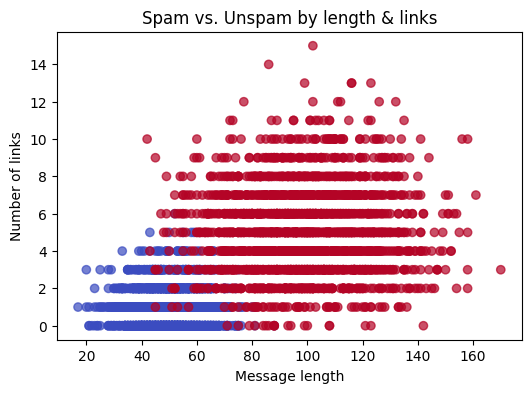

In [ ]:
## Visualize with matplotlib
#Pick two numeric features (e.g. “length” vs. “num_links” in spam):

plt.figure(figsize=(6,4))
plt.scatter(spam_df['length'], spam_df['num_links'],
            c=spam_df['label'].map({'spam':1,'unspam':0}),
            cmap='coolwarm', alpha=0.7)
plt.xlabel('Message length')
plt.ylabel('Number of links')
plt.title('Spam vs. Unspam by length & links')
plt.show()


In [ ]:
# Pre-process & split
# Features / labels for spam
X_spam = spam_df[['length','num_links']]
y_spam = spam_df['label'].map({'spam':1,'unspam':0})

# # Features / labels for intrusion
# X_int = intrusion_df[['bytes_sent','packets_received']]
# y_int = intrusion_df['label'].map({'intrusion':1,'normal':0})

# Split (80% train / 20% test)
Xsp_train, Xsp_test, ysp_train, ysp_test = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=42)

# Xint_train, Xint_test, yint_train, yint_test = train_test_split(
#     X_int, y_int, test_size=0.2, random_state=42)


In [ ]:
# Train a KNN classifier
# Instantiate with k=5
knn_spam = KNeighborsClassifier(n_neighbors=5)
knn_spam.fit(Xsp_train, ysp_train)

# knn_int = KNeighborsClassifier(n_neighbors=5)
# knn_int.fit(Xint_train, yint_train)


KNeighborsClassifier()

In [ ]:
# Evaluate performance
# Spam
ysp_pred = knn_spam.predict(Xsp_test)
print("Spam classification report:")
print(classification_report(ysp_test, ysp_pred))
print("Confusion matrix:\n", confusion_matrix(ysp_test, ysp_pred))

# # Intrusion
# yint_pred = knn_int.predict(Xint_test)
# print("Intrusion classification report:")
# print(classification_report(yint_test, yint_pred))
# print("Confusion matrix:\n", confusion_matrix(yint_test, yint_pred))


Spam classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       422
           1       0.98      0.97      0.97       378

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Confusion matrix:
 [[413   9]
 [ 10 368]]


***Summary***

1. Import all needed libraries

2. Load your CSV into a pandas DataFrame

3. Explore: .head(), .info(), .value_counts()

4. Visualize raw data with matplotlib scatter plots

5. Pre-process: select features & encode labels

6. Split into train/test sets

7. Train KNN (.fit)

8. Predict & evaluate with classification report & confusion matrix

9. Save the model.

10. Plot decision boundaries to see how KNN partitions feature space (optional).

***Summary***

1. Import all needed libraries

2. Load your CSV into a pandas DataFrame

3. Explore: .head(), .info(), .value_counts()

4. Visualize raw data with matplotlib scatter plots

5. Pre-process: select features & encode labels

6. Split into train/test sets

7. Train KNN (.fit)

8. Predict & evaluate with classification report & confusion matrix

9. Save the model.

10. Plot decision boundaries to see how KNN partitions feature space (optional).

# **Your Task**
1. To understand the previous steps with Spam dataset and do the same with the
intrusion dataset.
2. Download the datasets from the lab folder in Week3.
3. After your implement the EDA and KNN, try to save the model (this will really help in CW1)
4. Don't forget to submit your work to Week3 submission point.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
spam_df = pd.read_csv('spam.csv')
print(spam_df.head())
print(spam_df['label'].value_counts())

   length  num_links   label
0      54          1  unspam
1      48          0  unspam
2      56          0  unspam
3      65          2  unspam
4      47          2  unspam
label
unspam    2000
spam      2000
Name: count, dtype: int64


In [15]:
# intrusion dataset
Intrusion_df = pd.read_csv('/content/Intrusion.csv')
print(Intrusion_df.head())
print(Intrusion_df['label'].value_counts())

   bytes_sent  packets_received   label
0         428               427  normal
1         665               398  normal
2         415               526  normal
3         452               425  normal
4         398               443  normal
label
normal       2000
intrusion    2000
Name: count, dtype: int64


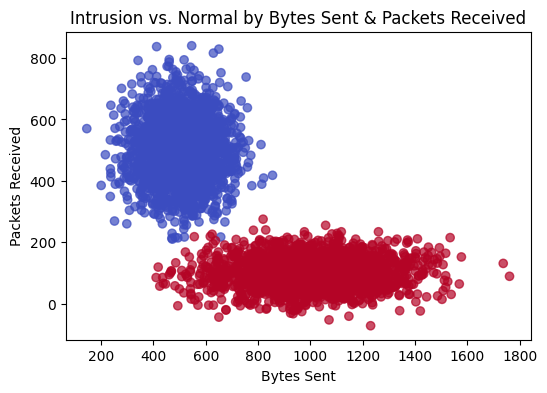

In [16]:
# Visualize with matplotlib for intrusion dataset


plt.figure(figsize=(6,4))
plt.scatter(Intrusion_df['bytes_sent'], Intrusion_df['packets_received'],
            c=Intrusion_df['label'].map({'intrusion':1,'normal':0}),
            cmap='coolwarm', alpha=0.7)
plt.xlabel('Bytes Sent')
plt.ylabel('Packets Received')
plt.title('Intrusion vs. Normal by Bytes Sent & Packets Received')
plt.show()

In [19]:
# Pre-process
X_int = Intrusion_df[['bytes_sent','packets_received']]
y_int = Intrusion_df['label'].map({'intrusion':1,'normal':0})

# Split (80% train / 20% test)
Xint_train, Xint_test, yint_train, yint_test = train_test_split(
    X_int, y_int, test_size=0.2, random_state=42)

In [20]:
# Train a KNN classifier for intrusion dataset
# Instantiate with k=5
knn_int = KNeighborsClassifier(n_neighbors=5)
knn_int.fit(Xint_train, yint_train)

KNeighborsClassifier()

In [21]:
# Evaluate
yint_pred = knn_int.predict(Xint_test)
print("Intrusion classification report:")
print(classification_report(yint_test, yint_pred))
print("\nConfusion matrix:\n", confusion_matrix(yint_test, yint_pred))

Intrusion classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       378

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Confusion matrix:
 [[422   0]
 [  0 378]]


In [22]:
# Save the mode
import pickle

# Save the trained KNN model for intrusion dataset
filename = 'knn_intrusion_model.pkl'
pickle.dump(knn_int, open(filename, 'wb'))

print(f"Intrusion KNN model saved to {filename}")



Intrusion KNN model saved to knn_intrusion_model.pkl
